__Imbalanced Classification__

In many real-world machine learning problems, the target classes are not evenly distributed. This situation is known as imbalanced classification, where one class (the majority class) significantly outnumbers the other class(es) (minority class).

Examples of imbalanced classification include:

Fraud detection (fraud vs. non-fraud transactions)

Disease diagnosis (rare disease vs. healthy patients)

Customer churn prediction (churn vs. non-churn)

Spam detection (spam vs. non-spam)

Traditional evaluation metrics such as accuracy can be misleading in imbalanced datasets, as a model may achieve high accuracy by simply predicting the majority class. Therefore, alternative metrics like precision, recall, F1-score, ROC-AUC, and confusion matrix are more appropriate for evaluating model performance.

In this notebook, we will:

Explore the challenges posed by imbalanced datasets

Analyze class distribution

Apply suitable evaluation metrics

Use techniques such as resampling (oversampling, undersampling) or algorithm-level approaches to improve model performance

The goal is to build models that effectively learn from minority classes while maintaining overall robustness and reliability.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

here 1 means customere who are exited and 0 means customere who are not churned. it is imbalanced because 3/4th of the data are not exited. when we build model, due to imbalanced reason not give good model

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df_up_encoded = pd.get_dummies(
    df,
    columns=["Geography", "Gender"],
    drop_first=True,
    dtype=int
)
df_up_encoded = df_up_encoded.drop(columns=["Surname"])


In [7]:
df_up_encoded.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
def model_split(data):
       x=data.drop(columns=["Exited"])
       y=data["Exited"]
       x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
       sc= StandardScaler()
       x_train_scaled=sc.fit_transform(x_train)
       x_test_scaled =sc.transform(x_test)
       lr = LogisticRegression()
       model=lr.fit(x_train_scaled,y_train)
       y_pred=model.predict(x_test_scaled)
       return (model,x_test_scaled,y_pred,y_test,)

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    confusion_matrix,
    accuracy_score,
    roc_curve
)

def classification(y_pred,y_test):
     TP = np.sum((y_pred==1)&(y_test==1))
     TN = np.sum((y_pred==0)&(y_test==0))
     FP = np.sum((y_pred==1)&(y_test==0))
     FN = np.sum((y_pred==0)&(y_test==1))
     PrecisionScore=precision_score(y_test,y_pred)
     RecallScore = recall_score(y_test,y_pred)
     Accuracy = accuracy_score(y_test,y_pred)
    
     return Accuracy,TP,TN,FP,FN,PrecisionScore,RecallScore


def curve_(y_test,y_prob,x_test):
     y_prob = model.predict_proba(x_test)[:,1]
     fpr, tpr,threshold=roc_curve(y_test, y_prob)

     plt.figure()
     plt.plot(fpr, tpr)
     plt.plot([0, 1], [0, 1], linestyle='--')
     plt.xlabel("False Positive Rate")
     plt.ylabel("True Positive Rate")
     plt.title("ROC Curve")
     plt.show()

In [32]:
import pandas as pd

class_data = pd.DataFrame(
    columns=[
        "name", "Accuracy", "TP", "TN", "FP", "FN",
        "PrecisionScore", "RecallScore"
    ]
)

def dataframe(name, Accuracy, TP, TN, FP, FN, PrecisionScore, RecallScore):
    global class_data
    class_data.loc[len(class_data)] = [
        name, Accuracy, TP, TN, FP, FN, PrecisionScore, RecallScore
    ]


In [11]:
x=df_up_encoded.drop(columns=["Exited"])
y=df_up_encoded["Exited"]

In [12]:
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0


<h2>UPSAMPLING</h2>

In [13]:
from sklearn.utils import resample

In [14]:
n_rows_maj = (df_up_encoded["Exited"]==0).sum()
n_min_rows = (df_up_encoded["Exited"]==1).sum()

In [15]:
maj_arr=df_up_encoded.loc[(df_up_encoded["Exited"]==0),:]
min_arr=df_up_encoded.loc[(df_up_encoded["Exited"]==1),:]

In [16]:
df_upsample = resample(min_arr,
                replace=True,
                n_samples=n_rows_maj,
                random_state=0
                )

In [17]:
df_upsample

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3240,3241,15717560,580,50,0,125647.36,1,1,0,57541.08,1,0,0,1
2629,2630,15711789,768,42,3,0.00,1,0,0,161242.99,1,0,1,0
8030,8031,15578141,592,38,3,0.00,1,1,1,12905.89,1,0,1,1
5853,5854,15765300,596,40,5,62389.03,3,1,0,148623.43,1,1,0,1
3957,3958,15756610,657,38,5,123770.46,1,0,0,47019.66,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,4534,15607275,850,39,6,206014.94,2,0,1,42774.84,1,0,1,1
5658,5659,15814430,747,41,9,0.00,1,1,0,32430.94,1,0,1,1
9405,9406,15807900,575,36,7,0.00,1,1,1,55868.97,1,0,0,1
8590,8591,15633194,771,41,10,108309.00,4,1,1,137510.41,1,0,0,0


In [18]:
df_up=pd.concat([df_up_encoded,df_upsample])

In [19]:
df_up

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,4534,15607275,850,39,6,206014.94,2,0,1,42774.84,1,0,1,1
5658,5659,15814430,747,41,9,0.00,1,1,0,32430.94,1,0,1,1
9405,9406,15807900,575,36,7,0.00,1,1,1,55868.97,1,0,0,1
8590,8591,15633194,771,41,10,108309.00,4,1,1,137510.41,1,0,0,0


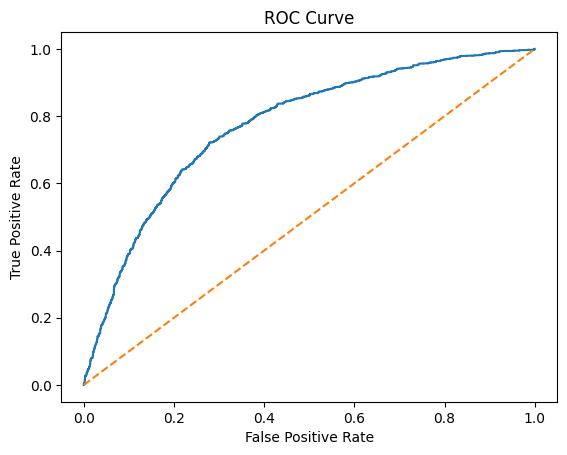

In [33]:
model,x_test,y_pred,y_test=model_split(df_up)
Accuracy,TP,TN,FP,FN,PrecisionScore,RecallScore=classification(y_pred,y_test)
dataframe("Upsample",Accuracy,TP,TN,FP,FN,PrecisionScore,RecallScore)
curve_(y_test, y_pred,x_test)

In [34]:
class_data.head()

,name,Accuracy,TP,TN,FP,FN,PrecisionScore,RecallScore
0,Upsample,0.715836,1535,1037,584,437,0.724398,0.778398
